# Tugas
<ul>
<li>Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.</li>
<li>Buatlah model CNN untuk klasifikasi dataset MNIST.</li>
</ul>

## Modifikasi model CNN pada praktikum 2

### Langkah 1 - Load Library

In [76]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Langkah 2 - Unduh Dataset CIFAR

In [77]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Langkah 3 - Verifikasi Data

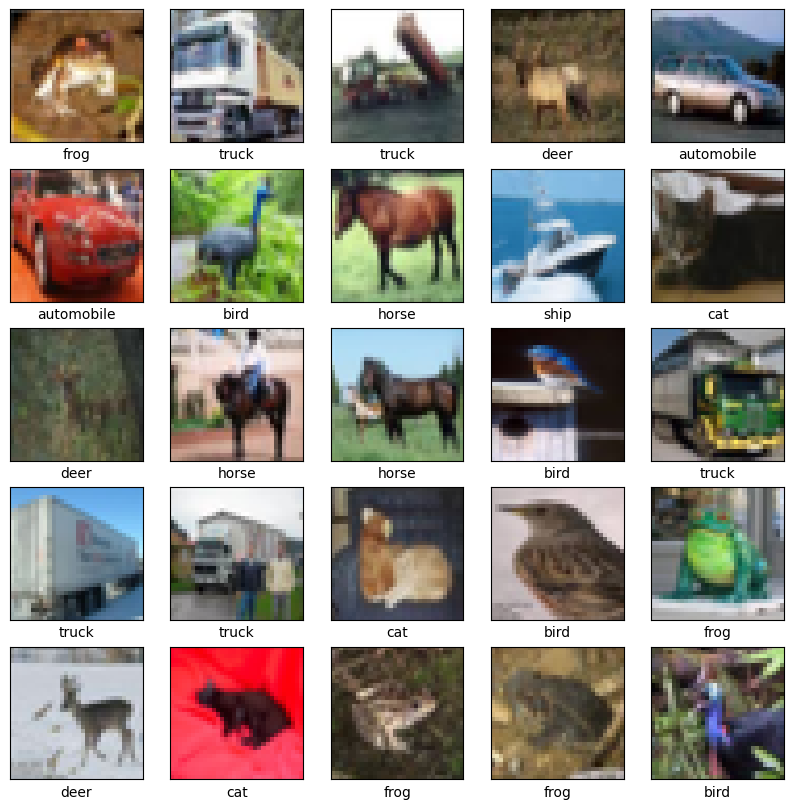

In [78]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Langkah 4 - Buat Model CNN

#### Langkah 4.1. - Buat Layer Konvolusi

In [79]:
from tensorflow.keras.layers import BatchNormalization

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())

#### Langkah 4.2. - Cek Arsitektur Konvolusi

In [80]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_16 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_17 (Ba  (None, 13, 13, 64)        256       
 tchNormalization)                                               
                                                      

#### Langkah 4.3. - Tambahkan Layer Fully Connected

In [81]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # Add dropout layer
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Add dropout layer
model.add(BatchNormalization())
model.add(layers.Dense(10))

#### Langkah 4.4. - Cek Arsitektur Model CNN

In [82]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_16 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_17 (Ba  (None, 13, 13, 64)        256       
 tchNormalization)                                               
                                                      

#### Langkah 4.5. - Compile Model CNN

In [83]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

initial_learning_rate = 0.001

lr_schedule = LearningRateScheduler(lambda epoch: initial_learning_rate * 0.9 ** epoch)

# Add this line before model.compile
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))


model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Langkah 5 - Fit Model

In [84]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

initial_learning_rate = 0.001

lr_schedule = LearningRateScheduler(lambda epoch: initial_learning_rate * 0.95 ** epoch)

model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[lr_schedule])


Epoch 1/50
1563/1563 [==============================] - 16s 9ms/step - loss: 1.5384 - accuracy: 0.4574 - val_loss: 1.8415 - val_accuracy: 0.3900 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1623 - accuracy: 0.5946 - val_loss: 1.2084 - val_accuracy: 0.5800 - lr: 9.5000e-04
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0312 - accuracy: 0.6416 - val_loss: 1.2682 - val_accuracy: 0.5709 - lr: 9.0250e-04
Epoch 4/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9463 - accuracy: 0.6747 - val_loss: 0.8924 - val_accuracy: 0.6891 - lr: 8.5737e-04
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8773 - accuracy: 0.6972 - val_loss: 0.9723 - val_accuracy: 0.6617 - lr: 8.1451e-04
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8278 - accuracy: 0.7167 - val_loss: 0.7753 - val_accuracy: 0.7332 - lr: 7.7378e-04
Epoch 7/50
1563/1563 [==========

### Langkah 6 - Evaluasi Model

313/313 - 1s - loss: 0.5963 - accuracy: 0.8109 - 1s/epoch - 4ms/step


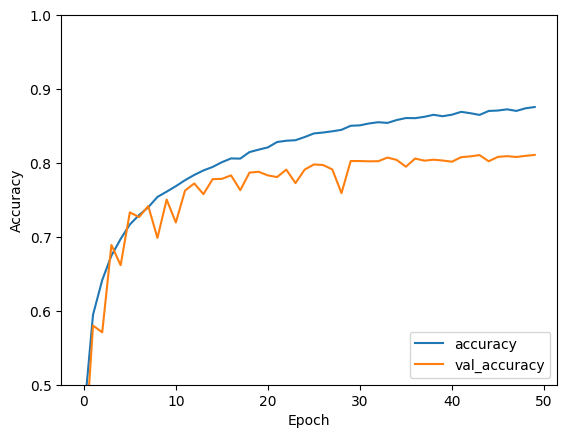

In [85]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Langkah 7 - Cetak Hasil Akurasi

In [86]:
print(test_acc)

0.8108999729156494


## Model CNN untuk klasifikasi dataset MNIST

### Langkah 1 - Load Library


In [87]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

### Langkah 2 - Unduh Dataset MNIST

In [88]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Langkah 3 - Preprocessing Data

In [89]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Langkah 4 - Buat Model CNN

In [90]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

### Langkah 5 - Compile Model CNN

In [91]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Langkah 6 - Fit Model

In [92]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 7s 6ms/step - loss: 0.1831 - accuracy: 0.9450 - val_loss: 0.0568 - val_accuracy: 0.9828
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0516 - accuracy: 0.9843 - val_loss: 0.0342 - val_accuracy: 0.9896
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0364 - accuracy: 0.9887 - val_loss: 0.0397 - val_accuracy: 0.9868
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.0332 - val_accuracy: 0.9891
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0385 - val_accuracy: 0.9875
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0275 - val_accuracy: 0.9917
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0150 - accuracy: 0.9950 - val_loss: 0.0349 - val_accuracy: 0.9896
Epoch 

### Langkah 6 - Evaluasi Model

313/313 - 1s - loss: 0.0379 - accuracy: 0.9894 - 770ms/epoch - 2ms/step


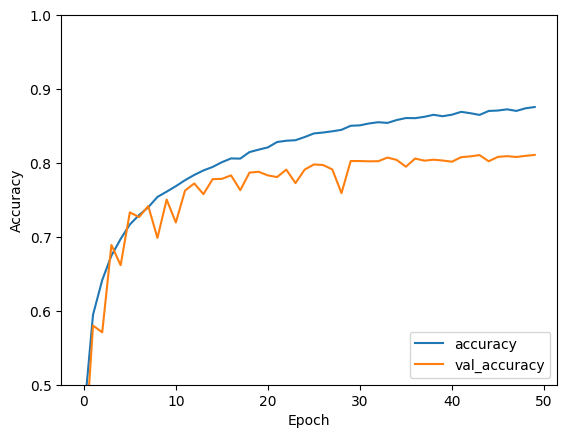

In [93]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Langkah 7 - Cetak Hasil Akurasi

In [94]:
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.9894000291824341
